In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# 3 Ants races

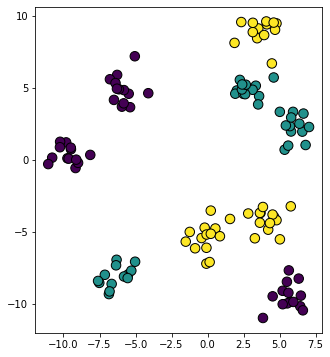

In [2]:
np.random.seed(10)
n_groups = 3
positions, groups = datasets.make_blobs(n_features=2, n_samples=120,
                          centers=9, cluster_std=.8)
groups %= n_groups

plt.figure(figsize=(6,6))
plt.axes(aspect=1)
plt.scatter(positions[:,0], positions[:,1], 
           c=groups, edgecolor='k', cmap='viridis', 
           s=90)
plt.show()

### 3 groups : green, yellow, margenta

In [3]:
X = np.array([-1.5, 6])
# dist = (x**2 + y**2)**1.5
dist2 = ((positions - X)**2).sum(1) # no need to find sqrt ( for performance )
idx = dist2.argmin()
print(groups[idx]) # this dot-point belongs to group 0
# dist2.shape
# ((positions - X)**2)

0


In [23]:
n_points = 5
dist = ((positions-X)**2).sum(1)
idx_nears = dist.argsort()
# idx_nears
near_groups = groups[idx_nears]
# near_groups
# groups
in_groups = np.array([(near_groups[:n_points]==k).sum() 
                      for k in  range(n_groups) ] )
# in_groups # these 5 points is in what groups ?
val_max = in_groups.max()
# val_max
is_max = in_groups == val_max
# is_max

for j in range(n_points):
    k = near_groups[j]
    if (is_max[k]):
        z = k # give max val of this group
        break
print(u'5 กลุ่มใกล้สุด %s \n คำตอบ %d' %(near_groups[:5], z))

5 กลุ่มใกล้สุด [0 1 1 0 1] 
 คำตอบ 1


# Random 15 points

In [26]:
n = 15
x = np.random.uniform(positions[:,0].min(), positions[:,0].max(), n)
y = np.random.uniform(positions[:,1].min(), positions[:,1].max(), n)
X = np.stack([x,y], 1)
# X

In [28]:
n_points = 5
dist = ((X[None]-positions[:,None])**2).sum(2)
near_groups = groups[dist.argsort(0)]
in_groups = np.stack([(near_groups[:n_points]==k).sum(0) 
                     for k in range(n_groups)])
val_max = in_groups.max()
is_max = in_groups == val_max
z = np.empty(n, dtype=int)
for i in range(n):
    for j in range(n_points):
        k = near_groups[j,i]
        if (is_max[k,i]):
            z[i] = k 
            break

[]

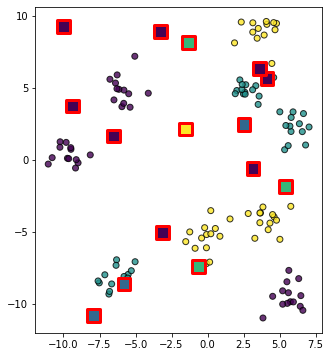

In [38]:
plt.figure(figsize=(6,6))
plt.axes(aspect=1)
plt.scatter(positions[:,0], positions[:,1], c=groups, 
           cmap='viridis', edgecolor='k', alpha=.8)
plt.scatter(x, y, s=160, c=z, marker='s', edgecolor='r', lw=3)
plt.plot()